# Internet Firewall data
- Dataset Information (By UCI Machine Learning)
This data set was collected from the internet traffic records on a university's firewall. There are 12 features in total. Action feature is used as a class. There are 4 classes in total. These are allow, action, drop and reset-both classes.

### Importing packages

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading dataset

In [2]:
df = pd.read_csv('log2.csv')
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


## Exploratory Data Analysis
- Information about dataset 
- Describing Dataset
- Splitting into features and labels
- Checking for N-unique values
- Checking for Value counts
- Encoding Label (pd.getdummies)
- Checking for NaN values
- Checking for the correaltion

### Information about Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


### Describing Dataset

In [4]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


### Splitting into features and labels

In [5]:
df_features = df.drop('Action',axis=1)
df_label = df[['Action']]

### Checking for N-unique values 

In [6]:
df_label.nunique()

Action    4
dtype: int64

### Checking for Value counts in label

In [7]:
df_label.value_counts()

Action    
allow         37640
deny          14987
drop          12851
reset-both       54
dtype: int64

### Encoding label using pd.getdummies

In [8]:
df_label_temp = pd.get_dummies(df_label)

### Checking for the NaN values

In [9]:
df_features.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [10]:
df_label.isnull().sum()

Action    0
dtype: int64

### Checking for the correalations 

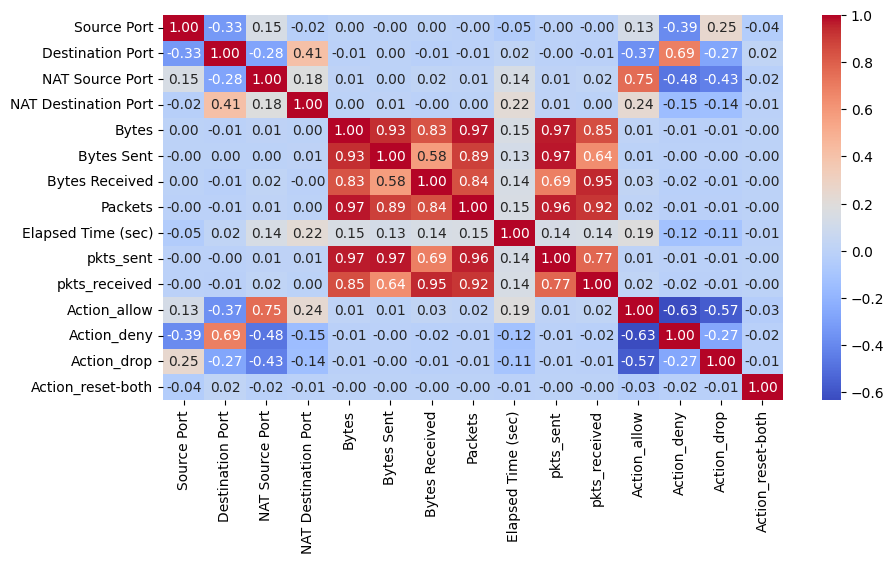

In [11]:
plt.figure(figsize=(10,5))
df_corr = pd.concat([df_features,df_label_temp],axis=1).corr()
df_corr_plot = sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

### Data Preprocessing
- Label Encoding
- Checking for Outliers
- Remove Outliers
- Standardize data
- Train test split

### Label Encoding

In [12]:
label_encoder = LabelEncoder()
df_label_encoded = label_encoder.fit_transform(df_label['Action'])
df_label_encoded = pd.DataFrame(df_label_encoded,columns=df_label.columns)
df_label_encoded.value_counts()
# 0: allow
# 1: deny 
# 2: drop 
# 3: reset-both      

Action
0         37640
1         14987
2         12851
3            54
dtype: int64

### Checking for an outliers

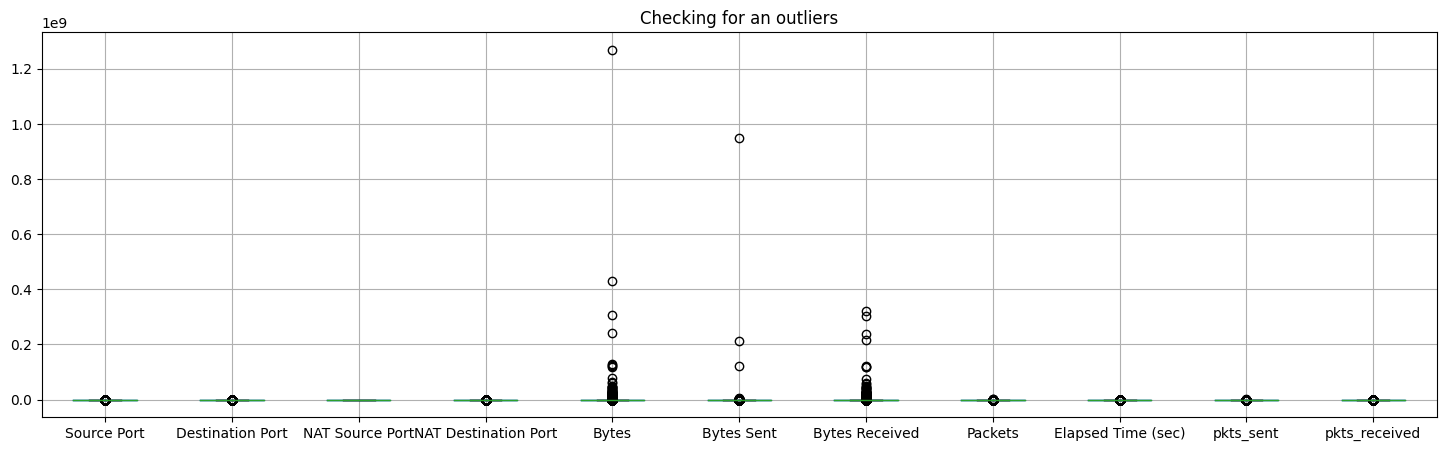

In [14]:
plt.figure(figsize=(18,5))
df_features.boxplot()
plt.title("Checking for an outliers")
plt.show()

### Removing Outliers
- After outliers are removed we have got an N number of outliers in Destination Port, so for training purpose we will be using unremoved outlier features

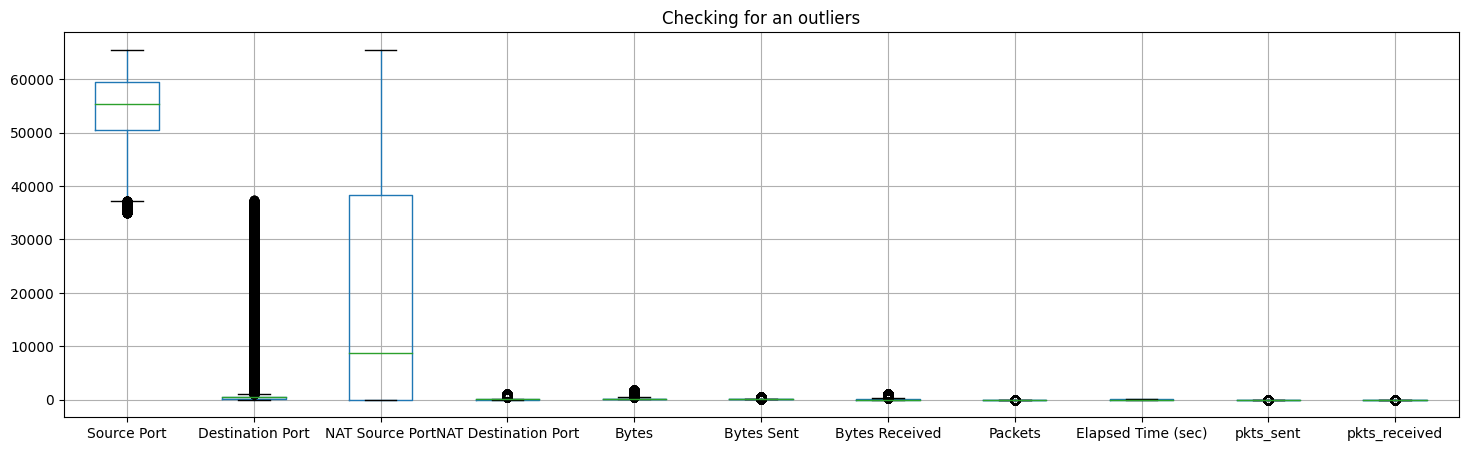

In [ ]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_features_no_outliers = df_features[(df_features >= lower_bound) & (df_features <= upper_bound)]
plt.figure(figsize=(18,5))
df_features_no_outliers.boxplot()
plt.title("Checking for an outliers")
plt.show()

### Standardize the data

In [16]:
scaler = StandardScaler()
df_feature_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features,columns=df_features.columns)

### Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_label_encoded,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(52425, 11) (13107, 11)
(52425, 1) (13107, 1)


### `NOTE:` Internet Firewall data, data preprocessing has done, Some additional things are yet to implement but you could use this model for deployment puropose, For more visit: www.github.com/itechdp